In [28]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from os import walk
from tqdm import tqdm

In [33]:
import scipy

In [34]:
print(scipy.__version__)

1.7.3


In [10]:
HG00358 = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG00358/BlockSize_dataframe.csv").drop(columns=['Unnamed: 0'])
HC02666 = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HC02666/BlockSize_dataframe.csv").drop(columns=['Unnamed: 0'])
HG01890 = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG01890/BlockSize_dataframe.csv").drop(columns=['Unnamed: 0'])
HG01952 = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG01952/BlockSize_dataframe.csv").drop(columns=['Unnamed: 0'])
HG01106 = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG01106/BlockSize_dataframe.csv").drop(columns=['Unnamed: 0'])
HG02011 = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG02011/BlockSize_dataframe.csv").drop(columns=['Unnamed: 0'])
T2T = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/T2T/BlockSize_dataframe.csv").drop(columns=['Unnamed: 0'])

In [15]:
print(HC02666.iloc[-1]['End'])
print(HG00358.iloc[-1]['End'])
print(HG01890.iloc[-1]['End'])
print(HG01952.iloc[-1]['End'])
print(T2T.iloc[-1]['End'])
print(HG01106.iloc[-1]['End'])
print(HG02011.iloc[-1]['End'])

54344470
58470497
46065018
23047400
62025213
37764911
40183735


In [9]:
#HC02666 - 28352770 - 54344470
#HG00358 - 26322873 - 58470497
#HG01890 - 28322354 - 46065018
#HG01952 - 453471 - 23047400
#T2T - 27462685 - 62025213
#HG01106 - 477441 - 37764911
#HG02011 - 16990156 - 40183735

In [12]:
print('HC02666: '+ str(54344470-28352770))
print('HG00358: '+ str(58470497-26322873))
print('HG01890: '+ str(46065018-28322354))
print('HG01952: '+ str(23047400-453471))
print('T2T: '+ str(62025213-27462685))
print('HG01106: '+ str(37764911-477441))
print('HG02011: '+ str(40183735-16990156))

HC02666: 25991700
HG00358: 32147624
HG01890: 17742664
HG01952: 22593929
T2T: 34562528
HG01106: 37287470
HG02011: 23193579


In [13]:
print('HC02666: '+ str(25991700/34562528))
print('HG00358: '+ str(32147624/34562528))
print('HG01890: '+ str(17742664/34562528))
print('HG01952: '+ str(22593929/34562528))
print('T2T: '+ str(34562528/34562528))
print('HG01106: '+ str(37287470/34562528))
print('HG02011: '+ str(23193579/34562528))

HC02666: 0.752019643933453
HG00358: 0.9301294164593515
HG01890: 0.513349717937299
HG01952: 0.653711701875511
T2T: 1.0
HG01106: 1.0788409343205452
HG02011: 0.6710614165723063


In [14]:
print('HC02666: '+ str(20*0.752019643933453))
print('HG00358: '+ str(20*0.9301294164593515))
print('HG01890: '+ str(20*0.513349717937299))
print('HG01952: '+ str(20*0.653711701875511))
print('T2T: '+ str(20))
print('HG01106: '+ str(20*1.0788409343205452))
print('HG02011: '+ str(20*0.6710614165723063))

HC02666: 15.04039287866906
HG00358: 18.602588329187032
HG01890: 10.266994358745979
HG01952: 13.07423403751022
T2T: 20
HG01106: 21.576818686410903
HG02011: 13.421228331446127


# Combine

In [11]:
allDF = pd.concat([HG00358,HC02666,HG01890,HG01952,HG01106,HG02011,T2T])

In [12]:
totalBlocks = []
for sample in set(allDF['SampleName']):
    totalBlocks.append(len(allDF[allDF['SampleName']==sample]))

In [13]:
totalBlocks

[82, 46, 34, 78, 46, 86, 56]

In [14]:
np.median(totalBlocks)

56.0

In [15]:
totalBlocksList = []
for sample in set(allDF['SampleName']):
    totalBlocksList.append([sample, sum(allDF[allDF['SampleName']==sample]['Length']), len(allDF[(allDF['SampleName']==sample)])])
totalBlockDF = pd.DataFrame(data=totalBlocksList, columns=['Sample', 'Het_Length', 'Total_Blocks'])    

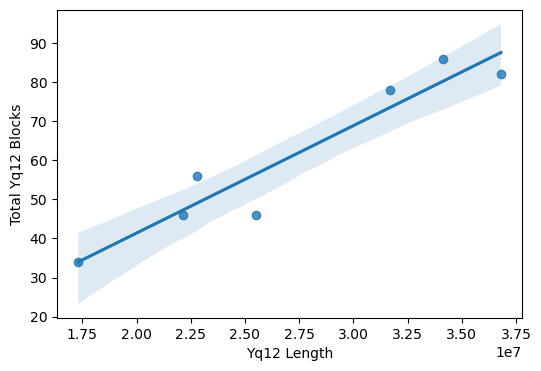

In [16]:
from matplotlib import rcParams
plt.rcParams.update(plt.rcParamsDefault)
rcParams['figure.figsize'] = 6,4
sns.regplot(data=totalBlockDF, x='Het_Length', y='Total_Blocks')
plt.xlabel("Yq12 Length")
plt.ylabel("Total Yq12 Blocks")
#plt.savefig("/home/mark/Desktop/chromosome_y/Images/Totalblocks_yq12Size.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [17]:
from scipy import stats
stats.spearmanr(totalBlockDF['Het_Length'], totalBlockDF['Total_Blocks'])

SpearmanrResult(correlation=0.900937462695559, pvalue=0.005620586715345014)

In [31]:
totalBlockDF['Het_Length']

0    36801396
1    25520702
2    17306028
3    31674023
4    22130142
5    34120272
6    22766404
Name: Het_Length, dtype: int64

In [32]:
totalBlockDF['Total_Blocks']

0    82
1    46
2    34
3    78
4    46
5    86
6    56
Name: Total_Blocks, dtype: int64

In [10]:
allDF

,Block_Number,Block_Type,Length,Start,End,SampleName
0,0,Spacer Block,850796,26796474,27647270,HG00358
1,0,Repeat Block,33734,27647271,27681004,HG00358
2,1,Spacer Block,453341,27681005,28134345,HG00358
3,1,Repeat Block,58954,28134346,28193299,HG00358
4,2,Spacer Block,75810,28193300,28269109,HG00358
...,...,...,...,...,...,...
81,40,Repeat Block,61620,61389881,61451500,HG002
82,41,Spacer Block,239710,61451501,61691210,HG002
83,41,Repeat Block,23386,61691211,61714596,HG002
84,42,Spacer Block,287520,61714597,62002116,HG002


In [14]:
for sample in set(allDF['SampleName']):
    print(sample)
    print(list(set(allDF[allDF['SampleName']==sample]['Block_Number'])))

HG02011
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
HG01952
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
HG01890
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
HG00358
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]
HC02666
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
HG01106
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
HG002
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]


In [15]:
for sample in set(allDF['SampleName']):
    print(sample)
    print('DYZ1 Block: min:'+str(np.min(list(set(allDF[(allDF['SampleName']==sample) & (allDF['Block_Type']=='Spacer Block')]['Length']))))+" max: "+str(np.max(list(set(allDF[(allDF['SampleName']==sample) & (allDF['Block_Type']=='Spacer Block')]['Length'])))))
    print('DYZ2 Block: min:'+str(np.min(list(set(allDF[(allDF['SampleName']==sample) & (allDF['Block_Type']=='Repeat Block')]['Length']))))+" max: "+str(np.max(list(set(allDF[(allDF['SampleName']==sample) & (allDF['Block_Type']=='Repeat Block')]['Length'])))))

HG02011
DYZ1 Block: min:50420 max: 1659604
DYZ2 Block: min:11215 max: 1148154
HG01952
DYZ1 Block: min:121875 max: 1675072
DYZ2 Block: min:23102 max: 2202896
HG01890
DYZ1 Block: min:219188 max: 1429077
DYZ2 Block: min:21037 max: 1978660
HG00358
DYZ1 Block: min:70570 max: 1355967
DYZ2 Block: min:13737 max: 967997
HC02666
DYZ1 Block: min:156745 max: 3599754
DYZ2 Block: min:23397 max: 1561087
HG01106
DYZ1 Block: min:188702 max: 1891251
DYZ2 Block: min:18296 max: 1191561
HG002
DYZ1 Block: min:81386 max: 1614064
DYZ2 Block: min:23097 max: 1183705


In [26]:
max(HG01106[HG01106['Block_Type']=='Spacer Block']['Length'])

1891251

In [27]:
max(HC02666[HC02666['Block_Type']=='Spacer Block']['Length'])

3599754

In [23]:
np.mean(allDF[allDF['Block_Type']=='Spacer Block']['Length'])

535313.6588785046

In [24]:
np.mean(allDF[allDF['Block_Type']=='Repeat Block']['Length'])

354027.30841121497

In [7]:
#DYZ1 Block
#Min
print(np.mean([188702,81386,50420,5722,70570,2628,156745]))
print('\n')
#Max
print(np.mean([1891251,1614064,1659604,1429077,1355967,1675072,3599754]))

79453.28571428571


1889255.5714285714


In [8]:
#DYZ2 Block
#Min
print(np.mean([18296,23097,11215,21037,13737,23102,23397]))
print('\n')
#Max
print(np.mean([1191561,1183705,1148154,1978660,967997,1802488,1561087]))

19125.85714285714


1404807.4285714286


In [11]:
#allDF.to_csv("/home/mark/Desktop/chromosome_y/Dataframes/Supplemental_Table_YqHetCoordinates_allSamples")

(array([ 1.,  1.,  1.,  6.,  5., 10.,  2.,  2.,  6.,  1.,  1.,  1.,  0.,
         1.,  1.,  0.,  0.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.]),
 array([  81386.        ,  132475.26666667,  183564.53333333,
         234653.8       ,  285743.06666667,  336832.33333333,
         387921.6       ,  439010.86666667,  490100.13333333,
         541189.4       ,  592278.66666667,  643367.93333333,
         694457.2       ,  745546.46666667,  796635.73333333,
         847725.        ,  898814.26666667,  949903.53333333,
        1000992.8       , 1052082.06666667, 1103171.33333333,
        1154260.6       , 1205349.86666667, 1256439.13333333,
        1307528.4       , 1358617.66666667, 1409706.93333333,
        1460796.2       , 1511885.46666667, 1562974.73333333,
        1614064.        ]),
 <BarContainer object of 30 artists>)

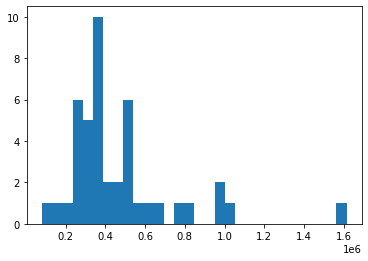

In [14]:
plt.hist(list(allDF[(allDF['SampleName']=='HG002') & (allDF['Block_Type']=='Spacer Block')]['Length']), bins=30)

(array([6., 4., 4., 4., 2., 6., 3., 1., 1., 1., 0., 0., 0., 0., 0., 1., 3.,
        1., 0., 1., 0., 3., 0., 1., 0., 0., 0., 0., 0., 1.]),
 array([  23097.        ,   61783.93333333,  100470.86666667,
         139157.8       ,  177844.73333333,  216531.66666667,
         255218.6       ,  293905.53333333,  332592.46666667,
         371279.4       ,  409966.33333333,  448653.26666667,
         487340.2       ,  526027.13333333,  564714.06666667,
         603401.        ,  642087.93333333,  680774.86666667,
         719461.8       ,  758148.73333333,  796835.66666667,
         835522.6       ,  874209.53333333,  912896.46666667,
         951583.4       ,  990270.33333333, 1028957.26666667,
        1067644.2       , 1106331.13333333, 1145018.06666667,
        1183705.        ]),
 <BarContainer object of 30 artists>)

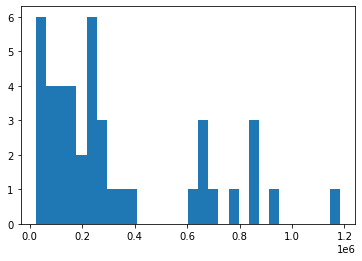

In [15]:
plt.hist(list(allDF[(allDF['SampleName']=='HG002') & (allDF['Block_Type']=='Repeat Block')]['Length']), bins=30)

In [28]:
from scipy.stats import mannwhitneyu
print(mannwhitneyu(allDF[(allDF['SampleName']=='HG002') & (allDF['Block_Type']=='Repeat Block')]['Length'], allDF[(allDF['SampleName']=='HG002') & (allDF['Block_Type']=='Spacer Block')]['Length'], method="exact"))
print(mannwhitneyu(allDF[(allDF['SampleName']=='HG02011') & (allDF['Block_Type']=='Repeat Block')]['Length'], allDF[(allDF['SampleName']=='HG02011') & (allDF['Block_Type']=='Spacer Block')]['Length'], method="exact"))
print(mannwhitneyu(allDF[(allDF['SampleName']=='HG01106') & (allDF['Block_Type']=='Repeat Block')]['Length'], allDF[(allDF['SampleName']=='HG01106') & (allDF['Block_Type']=='Spacer Block')]['Length'], method="exact"))
print(mannwhitneyu(allDF[(allDF['SampleName']=='HG01952') & (allDF['Block_Type']=='Repeat Block')]['Length'], allDF[(allDF['SampleName']=='HG01952') & (allDF['Block_Type']=='Spacer Block')]['Length'], method="exact"))
print(mannwhitneyu(allDF[(allDF['SampleName']=='HG01890') & (allDF['Block_Type']=='Repeat Block')]['Length'], allDF[(allDF['SampleName']=='HG01890') & (allDF['Block_Type']=='Spacer Block')]['Length'], method="exact"))
print(mannwhitneyu(allDF[(allDF['SampleName']=='HC02666') & (allDF['Block_Type']=='Repeat Block')]['Length'], allDF[(allDF['SampleName']=='HC02666') & (allDF['Block_Type']=='Spacer Block')]['Length'], method="exact"))
print(mannwhitneyu(allDF[(allDF['SampleName']=='HG00358') & (allDF['Block_Type']=='Repeat Block')]['Length'], allDF[(allDF['SampleName']=='HG00358') & (allDF['Block_Type']=='Spacer Block')]['Length'], method="exact"))

MannwhitneyuResult(statistic=541.0, pvalue=0.0007860257117004508)
MannwhitneyuResult(statistic=169.0, pvalue=0.0001672316805933855)
MannwhitneyuResult(statistic=617.0, pvalue=0.03816206472799973)
MannwhitneyuResult(statistic=172.0, pvalue=0.04248057943033832)
MannwhitneyuResult(statistic=51.0, pvalue=0.0008671214460509967)
MannwhitneyuResult(statistic=144.0, pvalue=0.007497632789824216)
MannwhitneyuResult(statistic=497.0, pvalue=0.008068691086352374)


In [31]:
allDF = pd.concat([HG01890,HG00358,HG01106,HG02011,T2T,HC02666,HG01952])

In [21]:
sampleList = ['HG01890', 'HG00358','HG01106','HG02011','HG002','HC02666','HG01952']

In [33]:
allDF.sort_values(by='SampleName')

,Block_Number,Block_Type,Length,Start,End,SampleName
33,16,Repeat Block,605216,48401760,49006975,HC02666
7,3,Repeat Block,349720,32374103,32723822,HC02666
6,3,Spacer Block,1204830,31169273,32374102,HC02666
5,2,Repeat Block,57613,31111660,31169272,HC02666
4,2,Spacer Block,156745,30954915,31111659,HC02666
...,...,...,...,...,...,...
31,15,Repeat Block,106852,29949653,30056504,HG02011
30,15,Spacer Block,424617,29525036,29949652,HG02011
29,14,Repeat Block,726225,28798811,29525035,HG02011
27,13,Repeat Block,208961,28027871,28236831,HG02011


[<matplotlib.collections.PathCollection object at 0x7fe3300f7f40>, <matplotlib.collections.PathCollection object at 0x7fe330103640>, <matplotlib.patches.Rectangle object at 0x7fe3303053a0>, <matplotlib.patches.Rectangle object at 0x7fe3300f7790>]
['Spacer Block', 'Repeat Block', 'Spacer Block', 'Repeat Block']


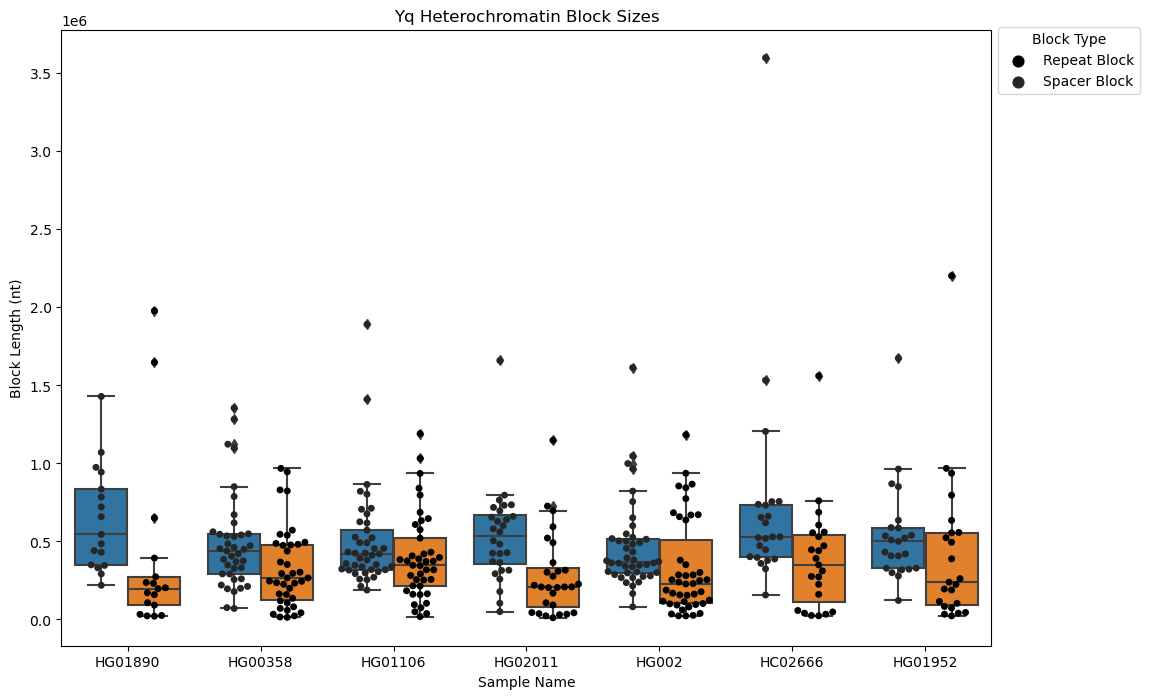

In [79]:
from matplotlib import rcParams
plt.rcParams.update(plt.rcParamsDefault)
rcParams['figure.figsize'] = 12,8
plt.title("Yq Heterochromatin Block Sizes")
ax2=sns.swarmplot(x="SampleName", y="Length", data=allDF, dodge=True, hue='Block_Type', color='black')
ax=sns.boxplot(x="SampleName", y="Length", data=allDF, dodge=True, hue='Block_Type')
handles, labels = plt.gca().get_legend_handles_labels()
print(handles)
print(labels)
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], title='Block Type', loc='center left', bbox_to_anchor=(1, 0.95)) 

plt.xlabel("Sample Name")
plt.ylabel("Block Length (nt)")

#plt.savefig("/home/mark/Desktop/chromosome_y/Images/BlockSize_BoxPlot.jpg", dpi=300, bbox_inches='tight')
#plt.savefig("/home/mark/Desktop/chromosome_y/Images/BlockSize_BoxPlot.pdf", dpi=300, bbox_inches='tight')

plt.show()

In [36]:
###################################################################################

In [11]:
sampleDict = {str(x).strip():{'Spacer Block':0 , 'Repeat Block':0} for x in set(allDF['SampleName'])}
sampleDict

{'HG01106': {'Spacer Block': 0, 'Repeat Block': 0},
 'HG01952': {'Spacer Block': 0, 'Repeat Block': 0},
 'HC02666': {'Spacer Block': 0, 'Repeat Block': 0},
 'HG01890': {'Spacer Block': 0, 'Repeat Block': 0},
 'HG02011': {'Spacer Block': 0, 'Repeat Block': 0},
 'HG002': {'Spacer Block': 0, 'Repeat Block': 0},
 'HG00358': {'Spacer Block': 0, 'Repeat Block': 0}}

In [26]:
allDF

,Block_Number,Block_Type,Length,Start,End,SampleName
0,0,Spacer Block,850796,26796474,27647270,HG00358
1,0,Repeat Block,33734,27647271,27681004,HG00358
2,1,Spacer Block,453341,27681005,28134345,HG00358
3,1,Repeat Block,58954,28134346,28193299,HG00358
4,2,Spacer Block,75810,28193300,28269109,HG00358
...,...,...,...,...,...,...
81,40,Repeat Block,61620,61389881,61451500,HG002
82,41,Spacer Block,239710,61451501,61691210,HG002
83,41,Repeat Block,23386,61691211,61714596,HG002
84,42,Spacer Block,287520,61714597,62002116,HG002


In [27]:
for key in sampleDict.keys():
    for value in list(allDF[(allDF['SampleName']==key) & (allDF['Block_Type']=='Spacer Block')]['Length']):
        sampleDict[key]['Spacer Block']+= int(value)
    for value in list(allDF[(allDF['SampleName']==key) & (allDF['Block_Type']=='Repeat Block')]['Length']):
        sampleDict[key]['Repeat Block']+= int(value)   

In [28]:
sampleDict

{'HG01106': {'Spacer Block': 20634209, 'Repeat Block': 16167187},
 'HG01952': {'Spacer Block': 12443467, 'Repeat Block': 9686675},
 'HC02666': {'Spacer Block': 16685340, 'Repeat Block': 8835362},
 'HG01890': {'Spacer Block': 10858812, 'Repeat Block': 6447216},
 'HG02011': {'Spacer Block': 14945555, 'Repeat Block': 7820849},
 'HG002': {'Spacer Block': 19951374, 'Repeat Block': 14168898},
 'HG00358': {'Spacer Block': 19038366, 'Repeat Block': 12635657}}

In [29]:
temppList = []
for key in sampleDict.keys():
    temppList.append([key, sampleDict[key]['Spacer Block'], 'Spacer Block'])
    temppList.append([key, sampleDict[key]['Repeat Block'], 'Repeat Block'])

    
tempDF = pd.DataFrame(data=temppList, columns=['Sample Name', 'Total Length', 'Block Type'])

[<BarContainer object of 7 artists>, <BarContainer object of 7 artists>]
['Spacer Block', 'Repeat Block']


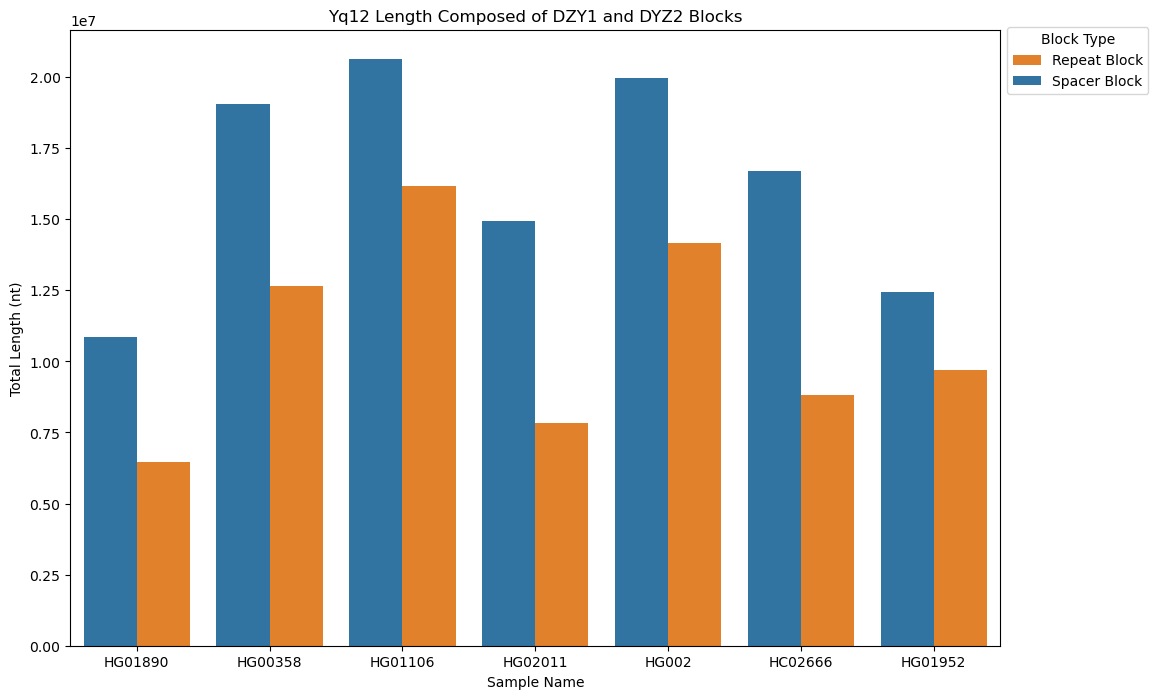

In [34]:
from matplotlib import rcParams
plt.rcParams.update(plt.rcParamsDefault)
rcParams['figure.figsize'] = 12,8
sampleList = ['HG01890', 'HG00358','HG01106','HG02011','HG002','HC02666','HG01952']
sns.barplot(x="Sample Name", y="Total Length", hue="Block Type", data=tempDF.set_index("Sample Name").loc[sampleList].reset_index())
handles, labels = plt.gca().get_legend_handles_labels()
print(handles)
print(labels)
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], title='Block Type', loc='center left', bbox_to_anchor=(1, 0.95)) 
plt.ylabel("Total Length (nt)")
plt.title("Yq12 Length Composed of DZY1 and DYZ2 Blocks")
#plt.savefig("/home/mark/Desktop/chromosome_y/Images/BlockSize_BoxPlot_totalLength.jpg", dpi=300, bbox_inches='tight')
#plt.savefig("/home/mark/Desktop/chromosome_y/Images/BlockSize_BoxPlot_totalLength.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [69]:
tempDFList2 = []
for sample in set(tempDF['Sample Name']):
    tempDFList2.append([sample, int(tempDF[(tempDF['Sample Name']==sample) & (tempDF['Block Type']=='Spacer Block')]['Total Length'])/int(sum(tempDF[tempDF['Sample Name']==sample]['Total Length'])), 'Spacer Block'])
    tempDFList2.append([sample, int(tempDF[(tempDF['Sample Name']==sample) & (tempDF['Block Type']=='Repeat Block')]['Total Length'])/int(sum(tempDF[tempDF['Sample Name']==sample]['Total Length'])), 'Repeat Block'])
tempDF2 = pd.DataFrame(data=tempDFList2, columns=['Sample Name', 'Percentage', 'Block Type'])

In [ ]:
{'HG01890': {'Spacer Block': 10858812, 'Repeat Block': 6447216},
 'HC02666': {'Spacer Block': 16685340, 'Repeat Block': 8835362},
 'HG01106': {'Spacer Block': 20634209, 'Repeat Block': 16167187},
 'HG002': {'Spacer Block': 19951374, 'Repeat Block': 14168898},
 'HG01952': {'Spacer Block': 12443467, 'Repeat Block': 9686675},
 'HG02011': {'Spacer Block': 14945555, 'Repeat Block': 7820849},
 'HG00358': {'Spacer Block': 19038366, 'Repeat Block': 12635657}}

In [65]:
6447216+10858812

17306028

In [66]:
6447216/17306028

0.3725416369371412

In [71]:
np.mean(tempDF2[tempDF2['Block Type'] == 'Repeat Block']['Percentage'])

0.3933551157983028

In [72]:
np.mean(tempDF2[tempDF2['Block Type'] == 'Repeat Block']['Percentage'])

0.3933551157983028

In [73]:
np.mean(tempDF2[tempDF2['Block Type'] == 'Spacer Block']['Percentage'])

0.6066448842016972

In [74]:
np.mean(tempDF2[tempDF2['Block Type'] == 'Spacer Block']['Percentage'])

0.6066448842016972

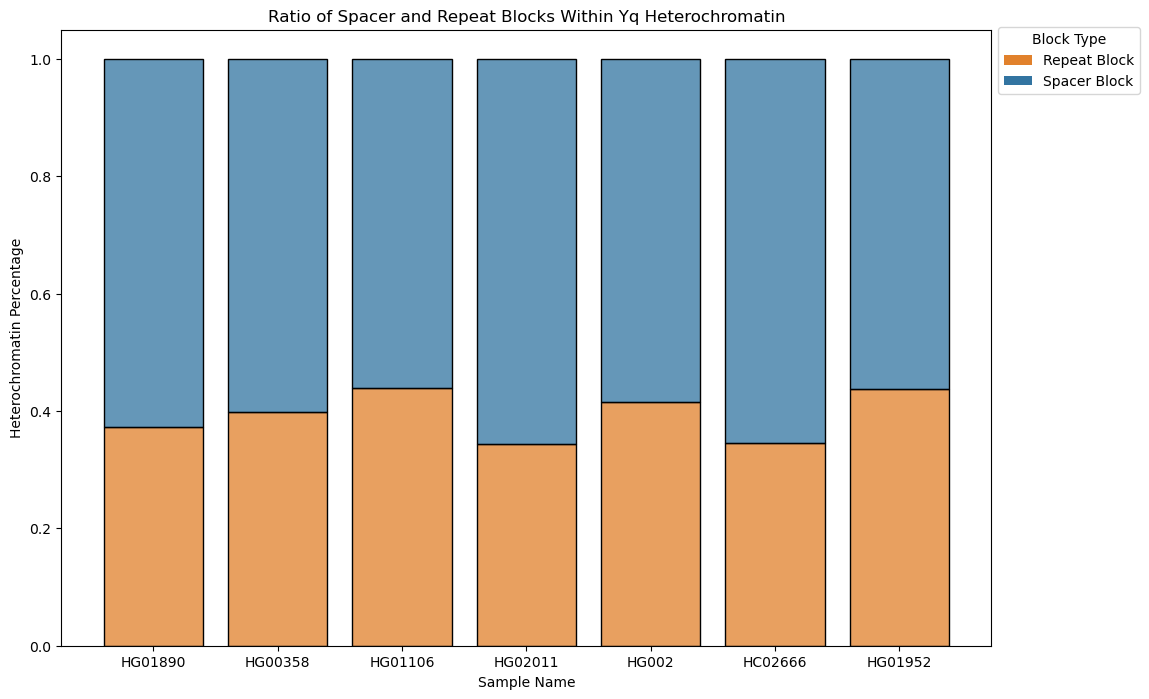

In [76]:
sns.histplot(tempDF2.set_index("Sample Name").loc[sampleList].reset_index(), x='Sample Name', weights='Percentage', hue='Block Type', multiple='stack', shrink=0.8, palette=['#3174A1', '#E1812B'])
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], title='Block Type', loc='center left', bbox_to_anchor=(1, 0.95)) 
plt.ylabel("Heterochromatin Percentage")
plt.title("Ratio of Spacer and Repeat Blocks Within Yq Heterochromatin")
#plt.savefig("/home/mark/Desktop/chromosome_y/Images/BlockSize_BoxPlot_totalLengthRatio.jpg", dpi=300, bbox_inches='tight')
#plt.savefig("/home/mark/Desktop/chromosome_y/Images/BlockSize_BoxPlot_totalLengthRatio.pdf", dpi=300, bbox_inches='tight')
plt.show()